In [3]:
import dill
dill.load_session('C:/Users/ress/Desktop/Università/FAD/Passatempo/GV/FAD_project/notebook_env.db')

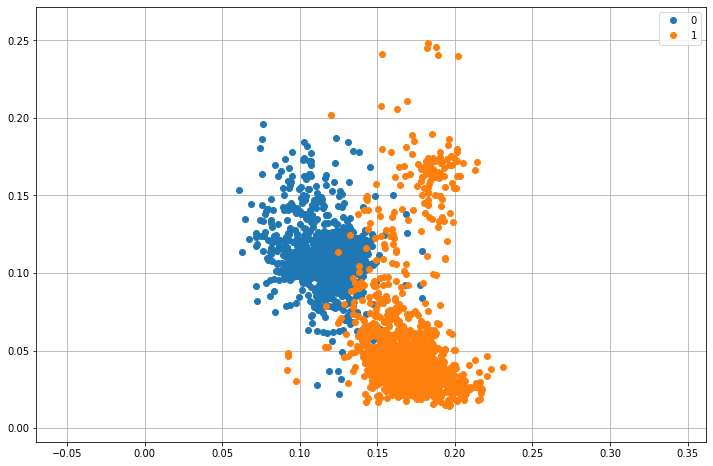

In [19]:
from matplotlib import pyplot as plt
def plot2d(data):
    classes = data['label'].unique()
    for c in classes:
        plt.plot(data.where(data['label']==c).dropna()['meanfun'].values,
                 data.where(data['label']==c).dropna()['IQR'].values,'o', label=c)

    plt.axis('equal')
    plt.margins(x=-0.25, y=0.1) 
    plt.grid()

plt.figure(figsize=(12,8))
plot2d(data_train)
plt.legend()
plt.show()

In [20]:
from sklearn.svm import SVC

#costruiamo il classificatore specificando un kernel lineare
#In questa fase impostiamo un parametro C alto in modo da penalizzare
#molto le variabili slack e ottenere un hard margin classico
svm = SVC(kernel='linear',C=10)
#allenaimo il modello
svm.fit(data_train[["meanfun","IQR"]], data_train['label'])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [22]:
probs=svm.predict(data_test[["meanfun","IQR"]])
test_gt=data_test.label
print("Classification Report:\n",classification_report(test_gt,probs))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       391
           1       0.97      0.93      0.95       401

    accuracy                           0.95       792
   macro avg       0.95      0.95      0.95       792
weighted avg       0.95      0.95      0.95       792



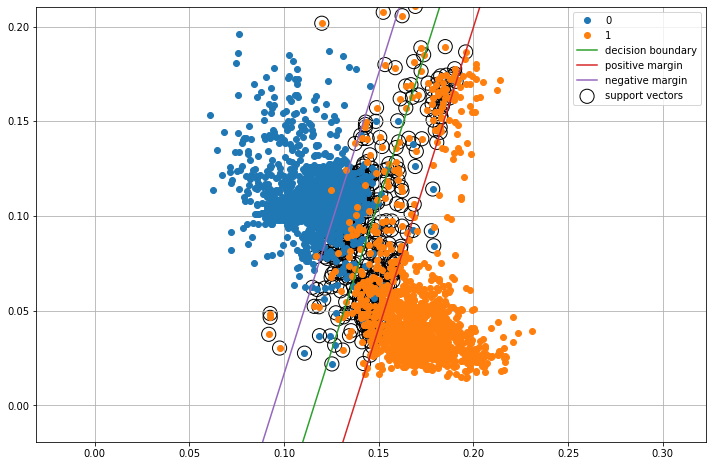

In [23]:
import numpy as np

def project(x,w,b):
    return -w[0]/w[1]*x-b/w[1]

def plot2dall(data,svm):
    w = (svm.dual_coef_.T*svm.support_vectors_).sum(0)
    b = svm.intercept_

    plot2d(data)
    plt.margins(x=-0.4, y=-0.33) 
    plt.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], 200,
                facecolors='none',edgecolors='k', label='support vectors')

    x=np.array([data.meanfun.min(),data.meanfun.max()])

    plt.plot(x,project(x,w,b), label='decision boundary')
    plt.plot(x,project(x,w,b-1), label='positive margin')
    plt.plot(x,project(x,w,b+1), label='negative margin')

plt.figure(figsize=(12,8))
plot2dall(data_train,svm)
plt.legend()
plt.show()

<h1>----------------------------------------------------------------------------------------------------
    -------------------------------------------------------------------------------------------------------------------------------------------------------------
    -------------------------------------------------------------------------------
    
    

In [24]:
svm = SVC(kernel='linear',C=10)
#allenaimo il modello
svm.fit(data_train.drop(columns="label"), data_train['label'])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
probs=svm.predict(data_test.drop(columns="label"))
test_gt=data_test.label
print("Classification Report:\n",classification_report(test_gt,probs))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       391
           1       0.97      0.96      0.96       401

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792



<h1> Without outliers

In [5]:
clean_svm = SVC(kernel='linear',C=100)
clean_svm.fit(data_clean_train[["meanfun","IQR"]], data_clean_train['label'])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [6]:
probs=clean_svm.predict(data_clean_test[["meanfun","IQR"]])
test_gt=data_clean_test.label
print("Classification Report:\n",classification_report(test_gt,probs))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       382
           1       0.98      0.98      0.98       350

    accuracy                           0.98       732
   macro avg       0.98      0.98      0.98       732
weighted avg       0.98      0.98      0.98       732



In [8]:
print(clean_svm.coef_)
print(clean_svm.intercept_)

[[ 60.9442925  -39.84313058]]
[-5.28434526]


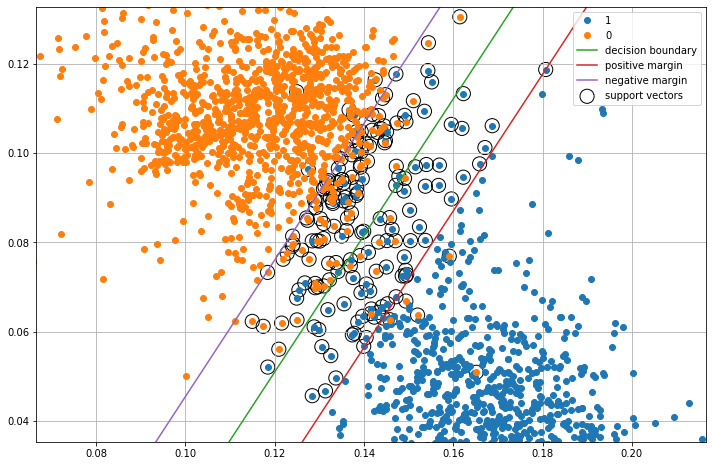

In [4]:
plt.figure(figsize=(12,8))
plot2dall(data_clean_train,clean_svm)
plt.legend()
plt.show()

In [6]:
svm.fit(data_clean_train.drop(columns="label"), data_clean_train['label'])
probs=svm.predict(data_clean_test.drop(columns="label"))
test_gt=data_clean_test.label
print("Classification Report:\n",classification_report(test_gt,probs))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       382
           1       0.98      0.99      0.99       350

    accuracy                           0.99       732
   macro avg       0.99      0.99      0.99       732
weighted avg       0.99      0.99      0.99       732



<h1>------------------------------------------------------------------------------------------------------------------------------PCA

In [11]:
pca_svm = SVC(kernel='linear',C=100)
pca_svm.fit(pca_train[["n3","n4"]], pca_train['label'])
probs=pca_svm.predict(pca_test[["n3","n4"]])
test_gt=pca_test.label
print("Classification Report:\n",classification_report(test_gt,probs))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       382
           1       1.00      0.99      0.99       350

    accuracy                           0.99       732
   macro avg       0.99      0.99      0.99       732
weighted avg       0.99      0.99      0.99       732



In [9]:
dill.dump_session('C:/Users/ress/Desktop/Università/FAD/Passatempo/GV/FAD_project/notebook_env.db')